In [29]:
#!pip install xlrd   version 2.0.1
#!pip install --upgrade xlrd
#!pip install --upgrade pandas

# Practica7- Proporciones, distribuciones y cantidades (Parte 2)
Para esta práctica usar:
- Dataset: Inmigración canadiense de 1980 a 2013.
- Gráficos de barras horizontales, con marcas de tendencia.
- Gráficos de sectores
- Gráficos de burbujas

In [30]:
import numpy as np  # útil para muchos cálculos científicos en Python
import pandas as pd # biblioteca primaria de estructura de datos

In [31]:
df_can = pd.read_excel('data/Canada.xls',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )


In [32]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Vamos hacer una limpieza de los datos para facilitar la creación de las visualizaciones.
* Remover las columnas 'AREA', 'REG', 'DEV', 'Type', 'Coverage'.
* Definir nombres más adecuados a las columnas 'OdName', 'AreaName' y 'RegName'.
* Asegurarse de que todas las columnas (DataFrame.columns) corresponden a tipo *string*.
* Usar el método *set_index()* del dataFrame para que los índices de las entradas sean los Paises.
* Adicionar una columna de "Total", en donde esta represente la suma del flujo total de migrantes hacia Canada desde los diferentes paises a lo largo de los años.


In [33]:
df_can.columns

Index([    'Type', 'Coverage',   'OdName',     'AREA', 'AreaName',      'REG',
        'RegName',      'DEV',  'DevName',       1980,       1981,       1982,
             1983,       1984,       1985,       1986,       1987,       1988,
             1989,       1990,       1991,       1992,       1993,       1994,
             1995,       1996,       1997,       1998,       1999,       2000,
             2001,       2002,       2003,       2004,       2005,       2006,
             2007,       2008,       2009,       2010,       2011,       2012,
             2013],
      dtype='object')

In [34]:
# Limpiar el conjunto de datos para eliminar columnas innecesarias (por ejemplo, REG)
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# Cambiemos el nombre de las columnas para que tengan sentido
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# Para tener coherencia, también hagamos que todas las etiquetas de columna sean de tipo cadena
df_can.columns = list(map(str, df_can.columns))

# Se agrega una columna de Total
df_can['Total'] = df_can.sum(axis=1)

# Años que usaremos en esta practica - útil para trazar más adelante
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 39)


/tmp/ipykernel_23012/830148785.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


In [35]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [36]:
# Examinemos los tipos de etiquetas de columna
all(isinstance(column, str) for column in df_can.columns)

df_can.columns = list(map(str, df_can.columns))

# Ahora vamos a comprobar los tipos de etiquetas de columna
all(isinstance(column, str) for column in df_can.columns)
df_can.set_index('Country', inplace=True)

# Veamos los primeros cinco elementos y veamos cómo se cambió el marco de datos
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


# Gráficos de barras (marco de datos) <a id="10"></a>

Un gráfico de barras es una forma de representar datos donde la _longitud_ de las barras representa la magnitud/tamaño de la característica/variable. Los gráficos de barras generalmente representan variables numéricas y categóricas agrupadas en intervalos.

Para crear un gráfico de barras, podemos pasar uno de los dos argumentos a través del parámetro `kind` en `plot()`:

-   `kind=bar` crea un gráfico de barras _vertical_
-   `kind=barh` crea un gráfico de barras _horizontal_


A veces es más práctico representar los datos horizontalmente, especialmente si necesita más espacio para etiquetar las barras. En los gráficos de barras horizontales, el eje $y$ se usa para etiquetar, y la longitud de las barras en el eje $x$ corresponde a la magnitud de la variable que se mide. Como verá, hay más espacio en el eje $y$ para etiquetar variables categóricas.

**Actividad**: Usando la capa de secuencias de comandos y el conjunto de datos df_can, cree un diagrama de barra horizontal que muestre el número total de inmigrantes a Canadá de los 15 países principales, para el período 1980 - 2013. Etiquete cada país con el recuento total de inmigrantes.

Paso 1: obtenga los datos correspondientes a los 15 países principales.

In [37]:
import matplotlib as mpl
import matplotlib.pyplot as plt

df_can.sort_values(by='Total', ascending=True, inplace=True)

# obtener los 15 países principales
df_top15 = df_can['Total'].tail(15)
df_top15

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

Paso 2: Trazar datos:

- Utilice kind='barh' para generar un gráfico de barras con barras horizontales.
- Asegúrese de elegir un buen tamaño para la trama y de etiquetar sus ejes y darle un título a la trama.
- Recorra los países y anote la población inmigrante utilizando la función de anotación de la interfaz de secuencias de comandos.

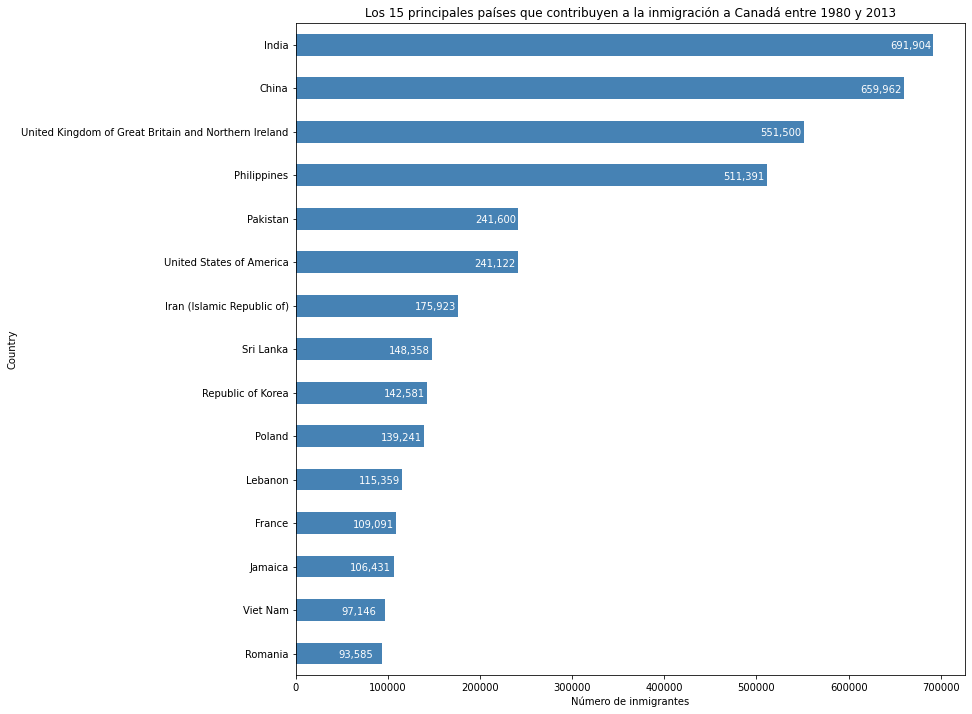

In [38]:
# generar trama
df_top15.plot(kind='barh', figsize=(12, 12), color='steelblue')
plt.xlabel('Número de inmigrantes')
plt.title('Los 15 principales países que contribuyen a la inmigración a Canadá entre 1980 y 2013')

# anotar etiquetas de valor para cada país
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # formato int con comas
    
    # coloque el texto al final de la barra (restando 47000 de "x" y 0.1 de "y" para que quede dentro de la barra)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='white')
    
plt.show()  

# EJERCICIO
Elabore una gráfica de barras horizontales, pero ahora hágalo para 3 periodos diferentes: 1980-1989, 1990-1999, 2000-2009; de manera que pueda visualizar la evolución de los datos. Describa brevemente sus conclusiones. 

# Gráficos circulares

Un gráfico circular es un gráfico que muestra proporciones numéricas dividiendo un círculo en porciones proporcionales. Podemos crear gráficos circulares en Matplotlib pasando la palabra clave kind=pie.

Usemos un gráfico circular para explorar la proporción (porcentaje) de nuevos inmigrantes agrupados por continentes durante todo el período de 1980 a 2013.

Paso 1: recopilar datos.

Usaremos el método pandas **groupby** para resumir los datos de inmigración por continente. El proceso general de groupby implica los siguientes pasos:

**Dividir**: dividir los datos en grupos según algunos criterios.

**Aplicar**: Aplicar una función a cada grupo de forma independiente: .sum() .count() .mean() .std() .aggregate() .apply() .etc..

**Combinar**: combinar los resultados en una estructura de datos.

In [39]:
# agrupar países por continentes y aplicar la función sum()
df_continents = df_can.groupby('Continent', axis=0).sum()

# nota: la salida del método groupby es un objeto "groupby".
# no podemos usarlo más hasta que apliquemos una función (por ejemplo, .sum())
print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


Paso 2: Trazar los datos. Pasaremos la palabra clave kind = 'pie', junto con los siguientes parámetros adicionales:

**autopct**: es una cadena o función utilizada para etiquetar las cuñas con su valor numérico. La etiqueta se colocará dentro de la cuña. Si es una cadena de formato, la etiqueta será fmt%pct.

**startangle**: gira el inicio del gráfico circular en grados de ángulo en sentido antihorario desde el eje $x$.

**shadow**: dibuja una sombra debajo del pastel (para dar una sensación de 3D).

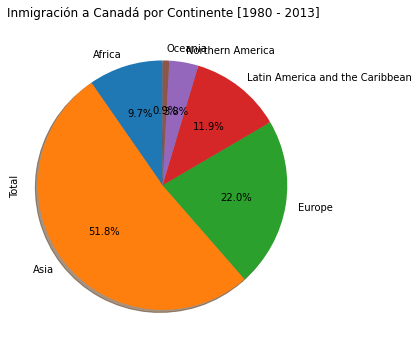

In [40]:
# autopct crear %, el ángulo de inicio representa el punto de inicio
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # añadir en porcentajes
                            startangle=90,     # ángulo de inicio 90° (África)
                            shadow=True,       # añadir sombra      
                            )

plt.title('Inmigración a Canadá por Continente [1980 - 2013]')
plt.axis('equal') # Establece el gráfico circular.

plt.show()

La imagen anterior no es muy clara, los números y el texto se superponen en algunos casos. Hagamos algunas modificaciones para mejorar las imágenes:

- Elimine las etiquetas de texto en el gráfico circular pasando la leyenda y agréguela como una leyenda separada usando **plt.legend()**.

- Empuje los porcentajes para que queden justo fuera del gráfico circular pasando el parámetro **pctdistance**.

- Pase un conjunto personalizado de colores para los continentes pasando el parámetro de colores.

- Expanda el gráfico circular para enfatizar los tres continentes más bajos (África, América del Norte y América Latina y el Caribe) pasando el parámetro de _explode_.

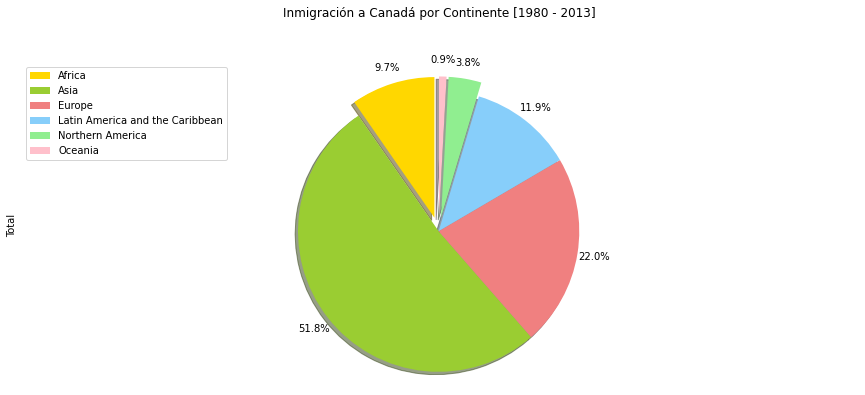

In [41]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # relación para cada continente con la que compensar cada cuña.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # desactive las etiquetas en el gráfico circular
                            pctdistance=1.12,    # la relación entre el centro de cada sector circular y el inicio del texto generado por autopct
                            colors=colors_list,  # añadir colores personalizados
                            explode=explode_list # "explotar" los 3 continentes más bajos
                            )

# aumentar el título en un 12% para que coincida con pctdistance
plt.title('Inmigración a Canadá por Continente [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# añadir leyenda
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

# EJERCICIO:
Usando un gráfico circular, explore la proporción (porcentaje) de nuevos inmigrantes agrupados por continentes en el año 2013.

# Gráficas de burbujas
Un gráfico de burbujas es una variación del gráfico de dispersión que muestra tres dimensiones de datos ($x, y, z$). Los puntos de datos se reemplazan con burbujas, y el tamaño de la burbuja está determinado por la tercera variable $z$, también conocida como peso. En maplotlib, podemos pasar una matriz o un escalar a la palabra clave "s" a plot(), que contiene el peso de cada punto.

**Comencemos analizando el efecto de la gran depresión argentina**.

Argentina sufrió una gran depresión entre 1998 y 2002, que provocó un desempleo generalizado, disturbios, la caída del gobierno y la suspensión de pagos de la deuda externa del país. En términos de ingresos, más del 50% de los argentinos eran pobres, y siete de cada diez niños argentinos eran pobres en la profundidad de la crisis de 2002.

Analicemos el efecto de esta crisis y comparemos la inmigración argentina con la de su vecino Brasil. Hagámoslo usando un diagrama de burbuja de inmigración de Brasil y Argentina para los años 1980 - 2013. Estableceremos los pesos para la burbuja como el valor normalizado de la población para cada año.

Paso 1: Obtenga los datos de Brasil y Argentina. Como en el ejemplo anterior, convertiremos los Años para escribir int y lo traeremos al marco de datos.

In [42]:
df_can_t = df_can[years].transpose() # marco de datos transpuesto

# emita los Años (el índice) para escribir int
df_can_t.index = map(int, df_can_t.index)

# vamos a etiquetar el índice. Este será automáticamente el nombre de la columna cuando restablezcamos el índice
df_can_t.index.name = 'Year'

# restablecer el índice para traer el año como una columna
df_can_t.reset_index(inplace=True)

# ver los cambios
df_can_t.head()

Country,Year,Palau,Marshall Islands,Western Sahara,San Marino,New Caledonia,American Samoa,Tuvalu,Sao Tome and Principe,Vanuatu,...,Poland,Republic of Korea,Sri Lanka,Iran (Islamic Republic of),United States of America,Pakistan,Philippines,United Kingdom of Great Britain and Northern Ireland,China,India
0,1980,0,0,0,1,0,0,0,0,0,...,863,1011,185,1172,9378,978,6051,22045,5123,8880
1,1981,0,0,0,0,0,1,1,0,0,...,2930,1456,371,1429,10030,972,5921,24796,6682,8670
2,1982,0,0,0,0,0,0,0,0,0,...,5881,1572,290,1822,9074,1201,5249,20620,3308,8147
3,1983,0,0,0,0,0,0,0,0,0,...,4546,1081,197,1592,7100,900,4562,10015,1863,7338
4,1984,0,0,0,0,0,0,1,0,0,...,3588,847,1086,1977,6661,668,3801,10170,1527,5704


Paso 2: Cree los pesos normalizados.

Existen varios métodos de normalización en estadística, cada uno con su propio uso. En este caso, utilizaremos el escalado de características para llevar todos los valores al rango [0,1]. La fórmula general es:

$$X^{\prime}=\frac{X-X_{min}}{X_{max}-X_{min}}$$

donde $X$ es un valor original, $X'$ es el valor normalizado. La fórmula establece el valor máximo en el conjunto de datos en 1 y establece el valor mínimo en 0. El resto de los puntos de datos se escalan a un valor entre 0-1 en consecuencia.

In [43]:
# normalizar datos de Brasil
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalizar datos de Argentina
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

Paso 3: Trazar los datos.

- Para trazar dos gráficos de dispersión diferentes en un gráfico, podemos incluir los ejes de un gráfico en el otro pasándolo a través del parámetro _ax_.

- También pasaremos los pesos usando el parámetro $s$. Dado que los pesos normalizados están entre 0 y 1, no serán visibles en el gráfico. Por lo tanto:
- multiplicar los pesos por 2000 para aumentar la escala en el gráfico y,
- agregue 10 para compensar el valor mínimo (que tiene un peso de 0 y, por lo tanto, se escala con x2000).

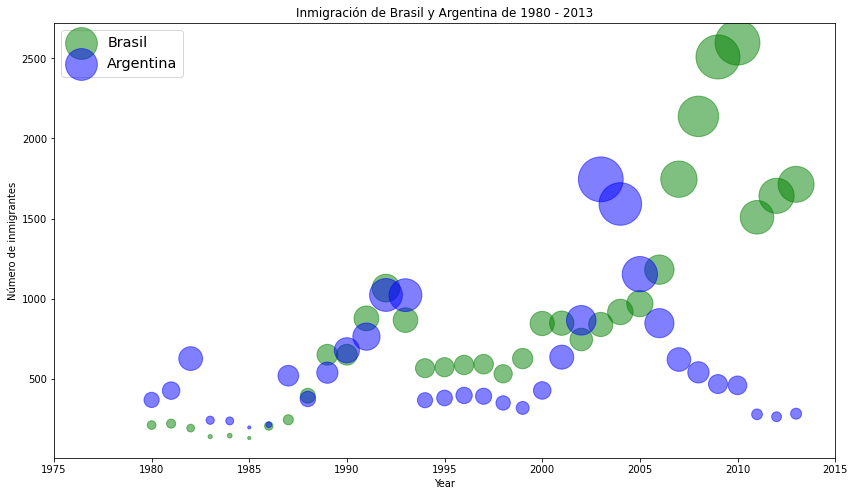

In [44]:
# Brasil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparencia
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pasar en pesos 
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Número de inmigrantes')
ax0.set_title('Inmigración de Brasil y Argentina de 1980 - 2013')
ax0.legend(['Brasil', 'Argentina'], loc='upper left', fontsize='x-large')

El tamaño de la burbuja corresponde a la magnitud de la población inmigrante para ese año, en comparación con los datos de 1980 - 2013. Cuanto más grande la burbuja, más inmigrantes en ese año.

En el gráfico anterior, podemos ver un aumento correspondiente en la inmigración de Argentina durante la gran depresión de 1998 a 2002. También podemos observar un pico similar alrededor de 1985 a 1993. De hecho, Argentina había sufrido una gran depresión entre 1974 y 1990, justo antes del inicio de la gran depresión de 1998 a 2002.

En una nota similar, Brasil sufrió el _Efecto Samba_ donde el real brasileño (moneda) cayó casi un 35% en 1999. Existía el temor de una crisis financiera sudamericana ya que muchos países sudamericanos dependían en gran medida de las exportaciones industriales de Brasil. Posteriormente, el gobierno brasileño adoptó un programa de austeridad y la economía se recuperó lentamente a lo largo de los años, culminando en un aumento en 2010. Los datos de inmigración reflejan estos eventos.

# EJERCICIO
Elabore un diagrama de burbujas de inmigración de China e India para visualizar cualquier diferencia con el tiempo desde 1980 hasta 2013. Puede usar **df_can_t** que definimos y usamos en el ejemplo anterior.

In [45]:
#!conda install -c conda-forge folium=0.5.0 --yes
#!pip install folium==0.5.0 

# Introducción a Folium

Folium es una biblioteca de Python que lo ayuda a crear varios tipos de mapas de folletos. El hecho de que los resultados de Folium sean interactivos hace que esta biblioteca sea muy útil para la creación de cuadros de mando.

In [46]:
import folium

print('Folium installed and imported!')

Folium installed and imported!


Generar el mapa del mundo es sencillo en Folium. Simplemente se crea un objeto Folium Map y luego lo muestra. Lo atractivo de los mapas de Folium es que son interactivos, por lo que puede hacer zoom en cualquier región de interés a pesar del nivel de zoom inicial.

In [47]:
# Se define el mapa mundial
world_map = folium.Map()

# Se muestra el mapa mundial
world_map

Puede personalizar esta definición predeterminada del mapa mundial especificando el centro de su mapa y el nivel de zoom inicial.

Todas las ubicaciones en un mapa están definidas por sus respectivos valores de Latitud y Longitud. Entonces puede crear un mapa y pasar en un centro de valores de Latitud y Longitud de [0, 0].

Para un centro definido, también puede definir el nivel de zoom inicial en esa ubicación cuando se representa el mapa. Cuanto mayor sea el nivel de zoom, más se acercará el mapa al centro.

Creemos un mapa centrado alrededor de Canadá y juguemos con el nivel de zoom para ver cómo afecta el mapa renderizado.

In [48]:
# Defina el mapa mundial centrado alrededor de Canadá con un nivel de zoom bajo
world_map = folium.Map(location=[56.130, -106.35], zoom_start=4)

# Mostrar el mapa del mundo
world_map

# Mapas de coropletas

Un mapa de coropletas es un mapa temático en el que las áreas están sombreadas o modeladas en proporción a la medida de la variable estadística que se muestra en el mapa, como la densidad de población o el ingreso per cápita. El mapa de coropletas proporciona una manera fácil de visualizar cómo varía una medida en un área geográfica o muestra el nivel de variabilidad dentro de una región. 

Ahora, creemos nuestro propio mapa de coropletas del mundo que represente la inmigración de varios países a Canadá.

Primero descarguemos e importemos nuestro principal conjunto de datos de inmigración canadiense usando el método pandas read_excel(). Normalmente, antes de que podamos hacer eso, necesitaríamos descargar un módulo que pandas requiere para leer en archivos de Excel. Este módulo es xlrd. 

In [49]:
!conda install -c anaconda xlrd --yes

zsh:1: command not found: conda


In [50]:
import pandas as pd # biblioteca primaria de estructura de datos
df_can = pd.read_excel('data/Canada.xls',
                     sheet_name='Canada by Citizenship',
                     skiprows=range(20),
                     skipfooter=2)

In [51]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [52]:
# limpiar el conjunto de datos para eliminar columnas innecesarias (por ejemplo, REG)
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# cambiemos el nombre de las columnas para que tengan sentido
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# para tener coherencia, también hagamos que todas las etiquetas de columna sean de tipo cadena
df_can.columns = list(map(str, df_can.columns))

# agregar columna Total
df_can['Total'] = df_can.sum(axis=1)

# años que usaremos en esta lección - útil para trazar más adelante
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 39)


/tmp/ipykernel_23012/2918359425.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


In [53]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


Para crear un mapa de coropletas, necesitamos un archivo GeoJSON que defina las áreas/límites del estado, condado o país que nos interesa. En nuestro caso, dado que nos esforzamos por crear un mapa mundial, queremos un GeoJSON que define los límites de todos los países del mundo. Llamémoslo world_countries.json.

Ahora que tenemos el archivo GeoJSON, vamos a crear un mapa mundial, centrado alrededor de los valores de latitud y longitud [0, 0], con un nivel de zoom inicial de 2 y usando el estilo Mapbox Bright.

In [54]:
import folium

world_geo = r'data/world_countries.json' # geojson file

# crear un mapa plano del mundo
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

Y ahora para crear un mapa de coropletas, usaremos el método de coropletas con los siguientes parámetros principales:

- geo_data, que es el archivo GeoJSON.

- data, que es el marco de datos que contiene los datos.

- columns, que representa las columnas en el marco de datos que se usarán para crear el mapa de coropletas.

- key_on, que es la clave o variable en el archivo GeoJSON que contiene el nombre de la variable de interés. Para determinar eso, deberá abrir el archivo GeoJSON usando cualquier editor de texto y anotar el nombre de la clave o variable que contiene el nombre de los países, ya que los países son nuestra variable de interés. En este caso, nombre es la clave en el archivo GeoJSON que contiene el nombre de los países. Tenga en cuenta que esta clave distingue entre mayúsculas y minúsculas, por lo que debe pasar exactamente como existe en el archivo GeoJSON.

In [55]:
 # Generar un mapa de coropletas utilizando la inmigración total de cada país a Canadá desde 1980 hasta 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Inmigración a Canadá'
    )
    # display map
world_map